# Measurement of matter antimatter differences with the LHCb experiment

![](http://lhcb-public.web.cern.ch/lhcb-public/en/LHCb-outreach/multimedia/LHCbDetectorpnglight1.png)

# Introduction
### Hit the grey arrow to extend a section

<b> Welcome to the HEP lab course of the TU Dortmund LHCb group</b>

<div align="justify"> This notebook is going to help you analysing data from the Large Hadron Collider (LHC) at CERN. The goal of your analysis is to make differences visible in the interactions of matter and [antimatter](https://en.wikipedia.org/wiki/Antimatter). This lab course is designed to make you capable to perform data analysis of HEP data on your onw, on  a level similiar to basic researches performed at CERN. Basic understanding of particle physics used to be sufficient and no very sophisticated knowledge is required.
    


# First steps

## Goal:
* Get familiar with the principles of this notebook
* Read simulated data
____

<div align="justify"> Like researchers at CERN you are going to write your own analysis code. To do so you are going to utilize `python`. Though, no experiences in using `python` are expected. There will be a sufficient amount of hints and examples with the exercises. If you need more help using python, there are [tutorials](http://www.tutorialspoint.com/python/) in the internet.

Examples of specific code that could be helpful for this analysis could be found in the example of an [analysis of Nobel laureates](Example-Analysis.ipynb). In this analysis utilizes similiar techniques as you will need for this course. Reading and understanding the code of the nobel laureates analysis could therefore make this lab course significantly easier.

Important: Each of the following code boxes will be executed by hitting Shift+Enter, after selecting the specific box.
The replacement of `In [x]:` (x is empty or a integer) by `In [*]:` next to a code box indicates, that the code is currently running.


## Reading simulated data

Simulated data are a great tool to develop your code and ensure it works correctly before analysing real data from LHCb. The latter are more difficult to analyse, since they contain two types of events. One being the events you are actually interested in, referred to as signal, and the ones that only look or behave similar, called background. In reality, the recorded data are also limited by the resolution of the detector.
The data samples provided for this exersice only contain signal events under the assumption of a perfect detector. 

In [1]:
from __future__ import print_function
from __future__ import division

%pylab inline
# Setup the notebook

import functools
import os
import warnings
from subprocess import check_output

import numpy
from ipywidgets import interact
import pandas
from root_pandas import read_root
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


warnings.filterwarnings("ignore")
rcParams['image.cmap'] = 'Blues'  # change default colormap
pandas.set_option('display.max_columns', None)


Populating the interactive namespace from numpy and matplotlib
Welcome to JupyROOT 6.16/00


In [2]:
plt.style.use('seaborn-paper')
plt.rcParams["patch.force_edgecolor"] = True
# increse font size numbers on the axes
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})

#figure size, the label are cutted when i save the figure
plt.rcParams.update({'figure.figsize': (6, 4)})
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'legend.fontsize': 14})
plt.rcParams.update({'legend.handlelength': 2})
plt.rcParams.update({'legend.handleheight': 0.5})
plt.rcParams.update({'legend.handletextpad': 0.5})
plt.rcParams.update({'legend.labelspacing': 0.5})
plt.rcParams.update({'legend.columnspacing': 1.0})
plt.rcParams.update({'legend.edgecolor': 'black'})
plt.rcParams.update({'legend.facecolor': 'inherit'})
plt.rcParams.update({'legend.framealpha': 1})
plt.rcParams.update({'legend.edgecolor': 'inherit'})
plt.rcParams.update({'legend.shadow': False})
plt.rcParams.update({'legend.frameon': True})
plt.rcParams.update({'legend.fancybox': True})
plt.rcParams.update({'legend.numpoints': 1})
plt.rcParams.update({'legend.scatterpoints': 1})
plt.rcParams.update({'legend.markerscale': 1.0})
plt.rcParams.update({'legend.borderpad': 0.4})

#increase size if the labels
plt.rcParams.update({'axes.labelsize': 18})

#increase the title size
plt.rcParams.update({'axes.titlesize': 18})

0.0064971169069175105


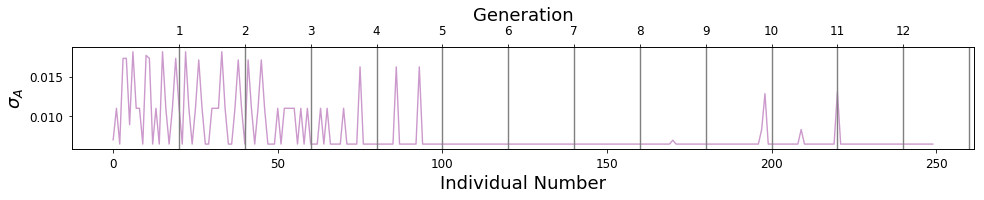

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 3))
ga = pd.read_csv('values_phys_2_par.csv')
ga = ga[ga['Fitness'] < 0.02]

ax1 = plt.gca()  # Get the current Axes instance
ax2 = ax1.twiny()  # Create a twin Axes sharing the y-axis

ax1.plot(ga['Fitness'][:250], color='purple', alpha=0.4)
ax1.set_xlabel('Individual Number')
ax1.set_ylabel('$\sigma_A$')
for i in range(13):
    ax1.axvline((i + 1) * 20, color='gray')  # Adjusted to start at 20 instead of 0

ax2.set_xlim(ax1.get_xlim())  # Set the limits of the second x-axis to match the first one
ax2.set_xticks([20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240])
ax2.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax2.set_xlabel('Generation')

plt.tight_layout()
plt.savefig('../Plots/genetic.png')
m = ga['Fitness'].idxmin()  # Changed argmin() to idxmin() for better clarity
parameters = ga.iloc[m]
print(parameters['Fitness'])


In [4]:
parameters

ProbPi     0.487415
ProbK      0.500276
Fitness    0.006497
Name: 2, dtype: float64

In [5]:
#SECOND RUN: min 50 and max 50

# H1_ProbPi    0.492103
# H2_ProbPi    0.498831
# H3_ProbPi    0.499719
# H1_ProbK     0.500833
# H2_ProbK     0.500170
# H3_ProbK     0.505095
# Fitness      0.006488

In [6]:
# H1_ProbPi    0.588409
# H2_ProbPi    0.561113
# H3_ProbPi    0.504052

# # H1_ProbK     0.321406
# H2_ProbK     0.683571
# H3_ProbK     0.207983
# # Fitness     -9.900408
# # Name: 1598, dtype: float64

If you need help with coding there are, in addition to the [example code](Example-Analysis.ipynb), hints in each section and an overview of useful functions in the instructions. Alternatively you can ask your supervisor for advice.

In [7]:
# Let us now load the simulated data
sim_data = read_root('/data/PhaseSpaceSimulation.root')

<div align="justify">Now that you can access the data, you can use a number of functions which can help you analyse it. You can find these functions in the libraries imported at the top of the page. Try to make a table of some of the information within your data file so that you can get a feeling of the typical values for attributes in the dataset. Understanding the range of values for different variables will help with plotting graphs.</div>

The data contains information about 'events' that were observed in the detector. An event refers to the particles produced when two proton bunches of the beams collided at the LHC. If you think of the data as a table, each row of the table is the results from a different collision and each column is a different measured quantity. 
 
We are interested in analysing the decays of particles called B<sup>+</sup> or B<sup>-</sup> mesons decaying into three other mesons called kaons (K<sup>+</sup> or K<sup>-</sup>). The events you have been given are those in which this process may have occurred. The detector has been used to reconstruct tracks that may have come from the kaons. You are given the measured momenta, charge, and likelihood of the tracks being kaons. You are given information for three tracks in each event, the ones that could be the three kaons that a B<sup>+</sup> or B<sup>-</sup> meson has decayed into. The instructions give an overview about the recorded information for each event.

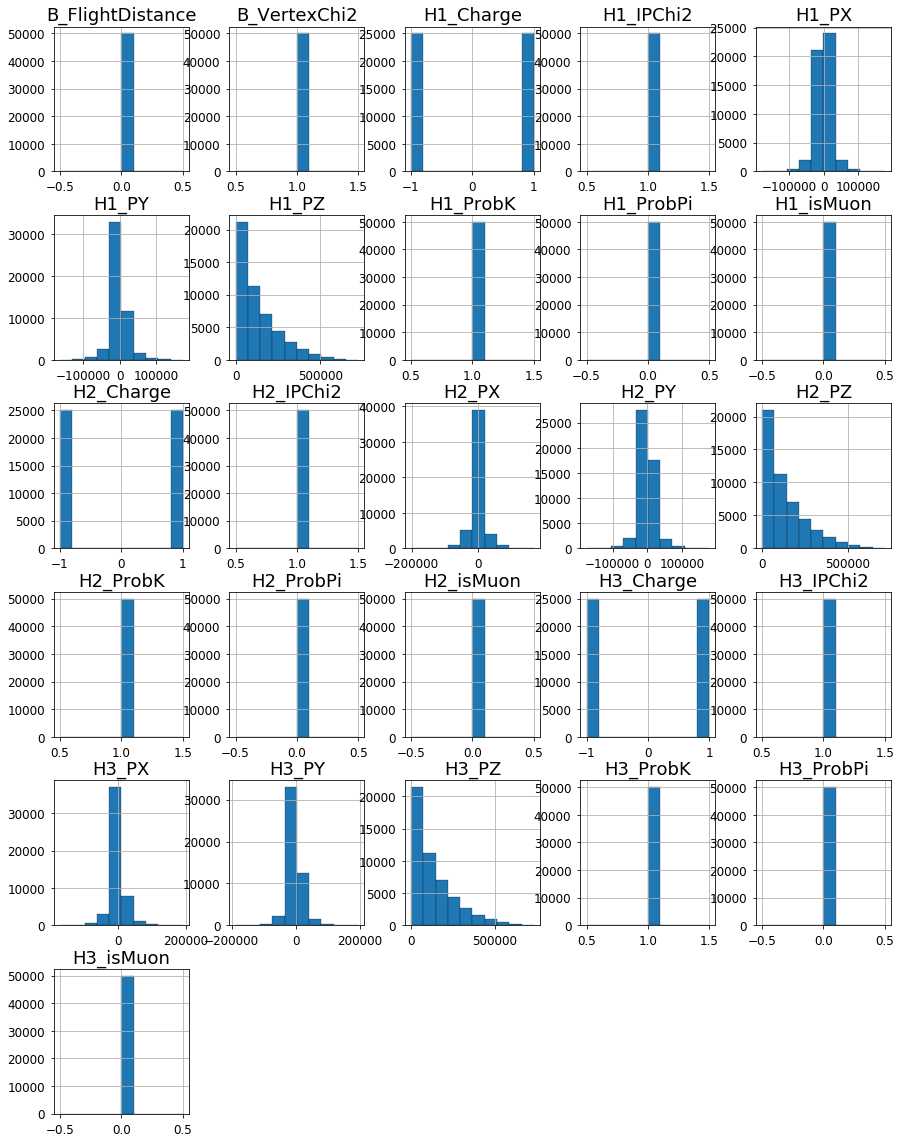

In [8]:
# make a table of the data variables here 
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
sim_data.hist(ax = ax);

### Hints

**Creating a table** - Use your `head()` - remember to look at the [example analysis](Example-Analysis.ipynb) to see how it was done there.

In [9]:
sim_data.head()

,B_FlightDistance,B_VertexChi2,H1_PX,H1_PY,H1_PZ,H1_ProbK,H1_ProbPi,H1_Charge,H1_IPChi2,H1_isMuon,H2_PX,H2_PY,H2_PZ,H2_ProbK,H2_ProbPi,H2_Charge,H2_IPChi2,H2_isMuon,H3_PX,H3_PY,H3_PZ,H3_ProbK,H3_ProbPi,H3_Charge,H3_IPChi2,H3_isMuon
0,0.0,1.0,3551.84,1636.96,23904.14,1.0,0.0,-1,1.0,0,41507.15,15980.59,331663.64,1.0,0.0,1,1.0,0,36100.40,16546.83,295600.61,1.0,0.0,-1,1.0,0
1,0.0,1.0,-2525.98,-5284.05,35822.00,1.0,0.0,1,1.0,0,-43182.91,-96553.03,585289.31,1.0,0.0,-1,1.0,0,-8648.32,-16617.56,98535.13,1.0,0.0,-1,1.0,0
2,0.0,1.0,-700.67,1299.73,8127.76,1.0,0.0,-1,1.0,0,-1411.99,3550.96,16120.27,1.0,0.0,1,1.0,0,-13483.34,10860.77,79787.59,1.0,0.0,1,1.0,0
3,0.0,1.0,3364.63,1397.30,222815.29,1.0,0.0,1,1.0,0,2192.42,1369.87,161924.75,1.0,0.0,-1,1.0,0,1925.16,-551.12,40420.96,1.0,0.0,1,1.0,0
4,0.0,1.0,-581.66,-1305.24,22249.59,1.0,0.0,-1,1.0,0,1153.05,-1998.17,66134.22,1.0,0.0,1,1.0,0,-2820.04,-8305.43,250130.00,1.0,0.0,-1,1.0,0


# Reconstruction of the invariant mass

## Aims:
* Plot histograms of the momenta of one of the kaon candidates
* Calculate the energy of each of the kaon candidates
* Plot the invariant masses of the B<sup>+</sup> or B<sup>-</sup> mesons

### Plotting a feature:

You can plot any features of the data in a histogram. Choose any suitable binning that allows you to observ the distribution of the variable clearly. Try making a histogram for the first kaon candidate's momentum x-component (H1_PX):



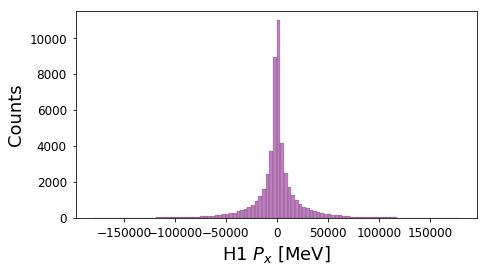

In [10]:
# make a histogram of the H1_PX variable here
plt.figure(figsize=(7,4))
plt.hist(sim_data['H1_PX'], bins = 100, alpha = 0.5, color = 'purple')
plt.xlabel('H1 $P_{x}$ [MeV]')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('../Plots/h1_px.png')
plt.show()

Momentum is a **vector** quantity, it has x,y, and z components. Compare the distributions of the different momentum components.
Try calculating the **magnitude** of the momentum of the first kaon candidate and plot a histogram of the resulting distribution. (You'll need the `H1_PX`, `H1_PY` and `H1_PZ` variables.)



In [11]:
g , p , b = 'springgreen', 'purple', 'lightskyblue'

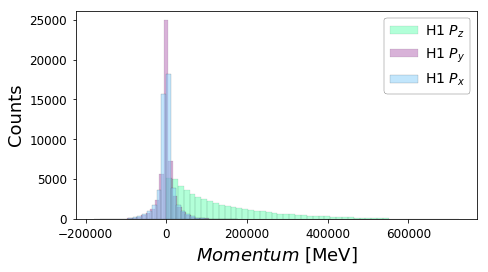

In [12]:
# make a histogram of the H1_PX, H1_PY and H1_PZ variables here
plt.figure(figsize=(7,4))
plt.hist(sim_data['H1_PZ'], bins = 50, label = 'H1 $P_{z}$', alpha = 0.3, color = g)
plt.hist(sim_data['H1_PY'], bins = 30, label = 'H1 $P_{y}$', alpha = 0.3, color = p)
plt.hist(sim_data['H1_PX'], bins = 30, label = 'H1 $P_{x}$', alpha = 0.5, color = b)
plt.xlabel('$Momentum $ [MeV]')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('../Plots/h1_px_py_pz.png')
plt.legend()
plt.show()

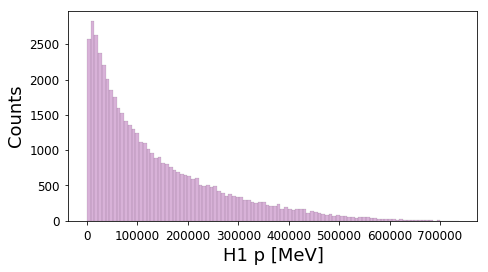

In [13]:
# calculate a variable for the magnitude of the momentum of the first kaon 
sim_data['H1_P'] = np.sqrt(sim_data['H1_PX']**2 + sim_data['H1_PY']**2 + sim_data['H1_PZ']**2)

plt.figure(figsize=(7,4))
plt.hist(sim_data['H1_P'], bins = 100, label = 'H1 P', alpha = 0.3, color = p)
plt.xlabel('H1 p [MeV]')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('../Plots/h1_p.png')
plt.show()


### Hints

**Histogram plotting** - You can use the `hist()` function. The parameters `bins(n)` and `range(x,y)` allow you to chose the binning and the range of the histogram.

## Energy and mass

Einstein's theory of special relativity relates energy, mass and momentum.
The momentum of the kaon candidates is measured with the detector (For one candidate you already plotted the components and the magnitude). The invariant mass of the kaon is well known and you can look it up. We wish to determine the energy of the kaons. With all these information you can calculate the energy of the kaon candidates easily using:


<latex> $E^2 = p^2 + m^2$ <latex>

In [14]:
M_K = 493.677 #MeV/c². 

In [15]:
# calculate the energy of the first kaon
sim_data["H1_E"] = np.sqrt(sim_data['H1_P']**2 + M_K**2)

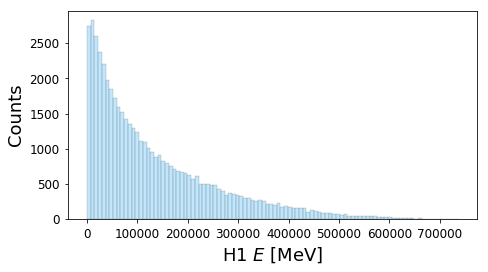

In [16]:
# plot a histogram of this variable

plt.figure(figsize=(7,4))
plt.hist(sim_data['H1_E'], bins = 100, label = 'H1 E', alpha = 0.5, color = b)
plt.xlabel('H1 $E$ [MeV]')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('../Plots/h1_p.png')
plt.show()


### Hints

**Energy calculation** - Use the magnitude of momentum variable you calculated above and the known invariant mass of the kaon to work out the energy of the first hadron. Calculate the energy squared, and then the energy and plot this.

**Kaon mass** - you can find the kaon mass on wikipedia or in physics textbooks. A commonly used reference for these kind of information is the Particle Data Group ([PDG](http://pdg.lbl.gov/2014/reviews/rpp2014-rev-charged-kaon-mass.pdf)). All knowledge about the properties of discovered particles are collected there.


Calculate the momenta and energies of the second and third kaon candidates as well.

In [17]:
# calculate variables for the energy of the other two kaons

#2 kaon
sim_data['H2_P'] = np.sqrt(sim_data['H2_PX']**2 + sim_data['H2_PY']**2 + sim_data['H2_PZ']**2)
sim_data["H2_E"] = np.sqrt(sim_data['H2_P']**2 + M_K**2)

#3 kaon
sim_data['H3_P'] = np.sqrt(sim_data['H3_PX']**2 + sim_data['H3_PY']**2 + sim_data['H3_PZ']**2)
sim_data["H3_E"] = np.sqrt(sim_data['H3_P']**2 + M_K**2)



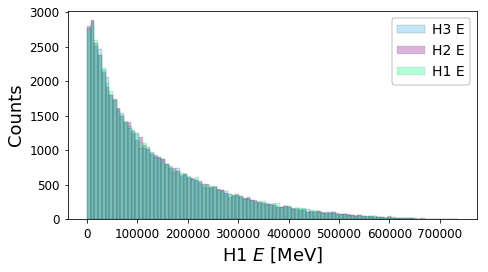

In [18]:
# plot a histogram of this variable

plt.figure(figsize=(7,4))
plt.hist(sim_data['H3_E'], bins = 100, label = 'H3 E', alpha = 0.5, color = b)
plt.hist(sim_data['H2_E'], bins = 100, label = 'H2 E', alpha = 0.3, color = p)
plt.hist(sim_data['H1_E'], bins = 100, label = 'H1 E', alpha = 0.3, color = g)
plt.legend()
plt.xlabel('H1 $E$ [MeV]')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('../Plots/h1_h2_h3_e.png')
plt.show()

## Adding features of the $B$ meson

In this analysis we are looking for B<sup>+</sup> or B<sup>-</sup> mesons (see [B meson](https://en.wikipedia.org/wiki/B_meson)) that have decayed into the three charged [kaons](https://en.wikipedia.org/wiki/Kaon).

Energy is a conserved quantities. This means that you can use the energy of the three 'daughter' kaons, which you have calculated above, to calculate the energy that the B meson that decayed into them must have.

Momentum is also a conserved quantity. Hence you can also use the momenta of the 'daughter' kaons to calculate the momentum of the B meson. But be careful - momentum is a **vector** quantity. 

Using the energy and the magnitude of the momentum you can use the energy-momentum relationship to calculate the invariant mass of the B meson.

In [19]:
# calculate the energy of the B meson
sim_data['B_E'] = sim_data['H1_E'] + sim_data['H2_E'] + sim_data['H3_E']

In [20]:
# calculate the momentum components of the B meson 
sim_data['B_PX'] = sim_data['H1_PX'] + sim_data['H2_PX'] + sim_data['H3_PX']
sim_data['B_PY'] = sim_data['H1_PY'] + sim_data['H2_PY'] + sim_data['H3_PY']
sim_data['B_PZ'] = sim_data['H1_PZ'] + sim_data['H2_PZ'] + sim_data['H3_PZ']
    
# and the magnitude of the momentum of the B meson
sim_data['B_P'] = np.sqrt(sim_data['B_PX']**2 + sim_data['B_PY']**2 + sim_data['B_PZ']**2)

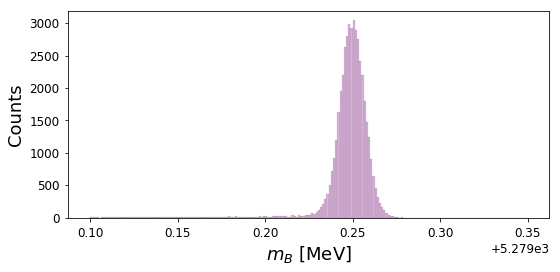

In [21]:
# calculate the B meson invariant mass
sim_data['B_M'] = np.sqrt(sim_data['B_E']**2 - sim_data['B_P']**2)

# plot the B meson invariant mass in a histogram
plt.figure(figsize=(8,4))
plt.hist(sim_data['B_M'], bins = 200, range =(5279.1,5279.35) , alpha = 0.3, color = p)
plt.xlabel('$m_B$ [MeV]')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('../Plots/B_M_fake.png')
plt.show()

You should have a graph that sharply peaks at the mass of the B<sup>+</sup> meson. The mass of the B<sup>+</sup> and B<sup>-</sup> meson are the same. Check that the peak of your graph is at the [known mass](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) of the B meson. 

Recall that you have made this plot for simulated data. How might you expect the ../Plots for real data to look different ? 

**Congratulations, you finished your first analysis steps!**
In the next section you will start to work with the real LHC data.

### Hints

**B Meson Energy** - From energy conservation, the energy of the B meson will be the sum of the energies of the three kaons: $E_B=E_{K1}+E_{K2}+E_{K3}$, where $E_B$ is the energy of the B meson, $E_{K1}, E_{K2}, E_{K3}$ are the energies of each of the kaons. 

**B meson momentum** - From momentum conservation, the X component of the momentum of the B meson will be the sum of the X momentum components of the three Kaons : $px_B=px_{K1}+px_{K2}+px_{K3}$, where $px$ is the X direction component of the momentum of the B meson, $px_{K1},px_{K2},px_{K3}$ are the X direction components of the momenta of the three kaons. You can then do the same with the Y and Z components. Having obtained the X,Y, and z components of the B momentum you can find the magnitude of the momentum of the B meson.

**B meson invariant mass*** - Rearrange the equation $E^2=p^2+m^2$ to find $m^2$. Using the values of the magnitude of the momentum of the B meson and the B meson Energy, find the mass of the B meson.

**Histogram plotting** - Take care that the range of your mass plot is set suitably that you can see the mass peak.

**Units** - The data you are provided use the unit 'MeV' (10<sup>6</sup> electron volts) for momenta.


# Working with real data
## Aims:

* Filter out data that is not coming from the B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup> decay channel, or the antiparticle equivalent B<sup>-</sup> → K<sup>+</sup>K<sup>-</sup>K<sup>−</sup>

* Plot a histogram of B-meson mass for the real data and observe how different cuts affect the data

In the previous section simulated data have been used to determine the invariant B<sup>±</sup> mass. Now you are going to utilize real LHCb data, recorded in 2011 during the first major data taking period of the LHC.

The data you are given has been filtered to select only events that are likely to have come from B<sup>+</sup> or B<sup>-</sup> mesons decaying into three final state charged particles. You are interested in the case where these three final state paticles are charged kaons K<sup>+</sup> or K<sup>-</sup>.


## Preselection
You want to apply a preselection to the data to select only events that have a high probability to contain three kaons in the final state. Therefore, you will need to:
* Ensure that they are not muons (use `H1_isMuon` and the equivilant for `H2` and `H3`)
* Require that they each have a low probability of being pions (e.g. `H1_ProbPi < 0.5`)
* Require that they each have a high probability of being a kaon (e.g. `H1_ProbK > 0.5`)

You need to find a balance between making cuts that are too loose and include too many background events and too tight and reject too many of your signal events.
Feel free to come back to this stage later and adjust your cuts to see the impact. 

Now develop your preselection and name it `'preselection'`. We have provided an example preselection in the hints, so feel free to use that to get started if you wish. Redefine the preselection after you have studied the ../Plots and check the impact.

In [22]:
# Make your preselection here, this line applies no preselection

preselection = f"H1_ProbPi < {parameters[0]} & H2_ProbPi < {parameters[0]} & H3_ProbPi < {parameters[0]} & H1_ProbK > {parameters[1]} & H2_ProbK > {parameters[1]} & H3_ProbK > {parameters[1]} & !H1_isMuon & !H2_isMuon & !H3_isMuon"

# preselection = "H1_ProbPi < 0.5 & H2_ProbPi < 0.5 & H3_ProbPi < 0.5 & H1_ProbK > 0.5 & H2_ProbK > 0.5 & H3_ProbK > 0.5 & !H1_isMuon & !H2_isMuon & !H3_isMuon"


This next line of code just loads the real data into a new DataFrame and applies your created preselection`'preselection'`. This may take a few minutes due to the size of the data sample.

In [23]:
real_data = read_root(['/data/B2HHH_MagnetUp.root', '/data/B2HHH_MagnetDown.root'], where=preselection)

In [24]:
print(1/np.sqrt(len(real_data)))

0.0065013239669028675


Make histograms of the probability of a final state particle being a kaon or a pion.
These will help to guide you on suitable probability values to cut on.

You can also consider more sophisticated options like 2-D ../Plots of kaon and pion probabilities or different values of the cuts for the different final state particles.

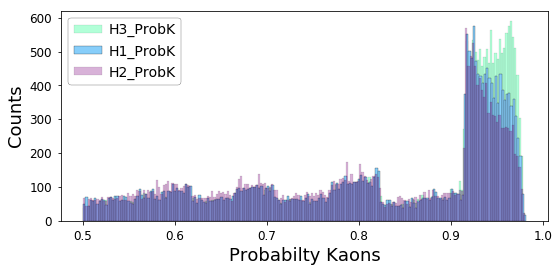

In [25]:
# plot the probability that a final state particle is a kaon
plt.figure(figsize=(8,4))
plt.hist(real_data['H3_ProbK'], bins = 200, label = 'H3_ProbK', alpha = 0.3, color = g)
plt.hist(real_data['H1_ProbK'], bins = 200, label = 'H1_ProbK', color = b)
plt.hist(real_data['H2_ProbK'], bins = 200, label = 'H2_ProbK', alpha = 0.3, color = p)
plt.legend()
plt.xlabel('Probabilty Kaons')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('../Plots/ProbK.png')
plt.show()

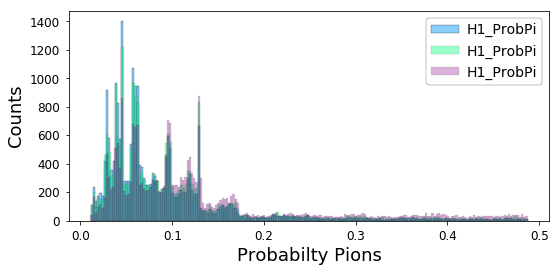

In [26]:
# plot the probability that a final state particle is a pion

plt.figure(figsize=(8,4))
plt.hist(real_data['H2_ProbPi'], bins = 200, label = 'H1_ProbPi', color = b)
plt.hist(real_data['H1_ProbPi'], bins = 200, label = 'H1_ProbPi', alpha = 0.4, color = g)
plt.hist(real_data['H3_ProbPi'], bins = 200, label = 'H1_ProbPi', alpha = 0.3, color = p)
plt.legend()
plt.xlabel('Probabilty Pions')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('../Plots/ProbPi.png')
plt.show()


Now calculate the invariant mass of the B meson for the real data and plot a histogram of this. Which differences do you observe compared to the mass plotted with simulated data? Try to explain the differences. 

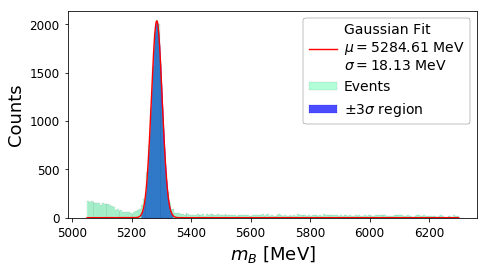

Fit results: mu = 5284.61 MeV, sigma = -18.13 MeV, A = 2036.90


In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Gaussian function definition
def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Calculate invariant masses
M_K = 493.677  # Kaon mass in MeV/c^2
real_data['H1_P'] = np.sqrt(real_data['H1_PX']**2 + real_data['H1_PY']**2 + real_data['H1_PZ']**2)
real_data["H1_E"] = np.sqrt(real_data['H1_P']**2 + M_K**2)

real_data['H2_P'] = np.sqrt(real_data['H2_PX']**2 + real_data['H2_PY']**2 + real_data['H2_PZ']**2)
real_data["H2_E"] = np.sqrt(real_data['H2_P']**2 + M_K**2)

real_data['H3_P'] = np.sqrt(real_data['H3_PX']**2 + real_data['H3_PY']**2 + real_data['H3_PZ']**2)
real_data["H3_E"] = np.sqrt(real_data['H3_P']**2 + M_K**2)

real_data['B_E'] = real_data['H1_E'] + real_data['H2_E'] + real_data['H3_E']
real_data['B_PX'] = real_data['H1_PX'] + real_data['H2_PX'] + real_data['H3_PX']
real_data['B_PY'] = real_data['H1_PY'] + real_data['H2_PY'] + real_data['H3_PY']
real_data['B_PZ'] = real_data['H1_PZ'] + real_data['H2_PZ'] + real_data['H3_PZ']
real_data['B_P'] = np.sqrt(real_data['B_PX']**2 + real_data['B_PY']**2 + real_data['B_PZ']**2)
real_data['B_M'] = np.sqrt(real_data['B_E']**2 - real_data['B_P']**2)

# Plot the B meson invariant mass in a histogram
plt.figure(figsize=(7, 4))
counts, bins, _ = plt.hist(real_data['B_M'], bins=200, range=(5050, 6300), alpha=0.3, label='Events', color=g)

# Bin centers for fitting
bin_centers = (bins[:-1] + bins[1:]) / 2

# Fit Gaussian to histogram data
popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=[5400, 50, max(counts)])

# Extract fit parameters
mu, sigma, A = popt


# Plot Gaussian fit
x_fit = np.linspace(5050, 6300, 1000)
y_fit = gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', label=f'Gaussian Fit\n$\mu={mu:.2f}$ MeV\n$\sigma={-sigma:.2f}$ MeV')

# Highlight signal region (within 1 sigma)
plt.fill_between(x_fit, y_fit, where=(x_fit < mu - 3*sigma) & (x_fit > mu + 3*sigma), color='blue', alpha=0.7, label='$\pm 3\sigma$ region')

plt.xlabel('$m_B$ [MeV]')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()
plt.savefig('../Plots/B_M_real_with_fit.png')
plt.show()

# Print fit results
print(f"Fit results: mu = {mu:.2f} MeV, sigma = {sigma:.2f} MeV, A = {A:.2f}")


Experiment with different cuts and observe the impact of them on the invariant mass plot.
You should select a set of cuts which preserves most of the signal while removing as much as possible of the background at the same time.
Once you have finalised the selection on particle identification, make cuts on the reconstructed particle mass to select the events in the B meson mass peak, removing the background events which lie at lower and higher invariant masses. 

### Hint: Preselection example

This is an example string, showing the syntax and giving you an example for a possible preselection.

In [28]:
# preselection = "H1_ProbPi < 0.5 & H2_ProbPi < 0.5 & H3_ProbPi < 0.5 & H1_ProbK > 0.5 & H2_ProbK > 0.5 & H3_ProbK > 0.5 & !H1_isMuon & !H2_isMuon & !H3_isMuon"


# Searching for global matter anti-matter differences

In this section you will start to study matter antimatter differences (CP Violation). The attribute 'global' means that you are looking for differences across all ranges of energy and momentum (the kinematics) of the kaons into which the charged B mesons have decayed. Later you will look at 'local' differences in different regions of the kinematics. 

## Aims:
* Calculate the global CP asymmetry 
* Work out the statistical uncertainty
* Determine, if there is evidence for CP violation in this decay

In order to quantify the matter antimatter asymmetry in this process, we will compare the B<sup>+</sup> meson with its anti-particle B<sup>-</sup>. 
Use the provided charge information (`H1_Charge`, `H2_Charge` and `H3_Charge`) to distinguish B<sup>+</sup> and B<sup>-</sup>.

In [29]:
# make a variable for the charge of the B mesons
real_data['B_CH'] = real_data['H1_Charge'] + real_data['H2_Charge'] + real_data['H3_Charge']

Now count the numbers of events of each of the two types (N<sup>+</sup> and N<sup>-</sup>) and the difference between those.

In [30]:
# make variables for the numbers of positive and negative B mesons
N_P = np.sum(real_data['B_CH'] + 1)/2
N_M = -np.sum(real_data['B_CH'] - 1)/2

print(N_P,N_M)
print(N_P + N_M)
print(real_data['B_CH'].shape[0])

12255.0 11404.0
23659.0
23659


Use the following equation to determine the Asmmetry:

<latex>$$A = \frac{N^+ - N^-}{N^+ + N^-}$$</latex>

In [31]:
# calculate the value of the asymmetry, by using the formula above, and then print it
A = (N_P - N_M) /(N_P + N_M)
print(A)

0.03596939853755442


### Hints

**Differentiating between B<sup>+</sup> and B<sup>-</sup>**

 - Charge is a conserved quantity. The charge of the $B$ meson is equal to the sum of the charges of the three daughter particles.
 - You can use ` len(real_data.query('B_Charge == charge'))` to count the number of mesons, where `B_Charge` is the variable you created and `charge` is `1` or `-1`.

### Estimating the significance of the deviation

You will now need to calculate the statistical uncertainty of the asymmetry. You can do so using the formula:

<latex>$$\sigma_A = \sqrt{\frac{1-A^2}{N^+ + N^-}}$$</latex>

The significance of the result, sigma, is found by dividing the value for asymmetry by its uncertainty. A value exceeding three sigma is considered "evidence" by particle physicists while a value of five sigma or more can be called an "observation" or "discovery".

In [32]:
# calculate the statistical significance of your result and print it
sig = np.sqrt((1-A**2)/(N_P + N_M))
s=A/sig
print('Sigma tot = {}  Significance = {}'.format(sig, s))

Sigma tot = 0.006497116906917511  Significance = 5.536209222164008


**Congratulations!** You have performed your first search for CP violaton.

Till now you have only considered the statistical uncertainty. Your measurement will also have other sources of uncertainty known as systematic uncertainties.
Try to include one systematic uncertainty for the production asymmetry of the $B$ meson and recalculate the significance. 


In [33]:
# sig_sys = 0.02 #Inaccuraacies in the measuring instruments.

In [34]:
# sig_tot = np.sqrt(sig**2 + sig_sys**2)
# s=A/sig_tot
# print('Sigma tot = {}  Significance = {}'.format(sig_tot, s))

# Dalitz ../Plots and two body resonances
## Aims:
* Produce Dalitz ../Plots of the simulation and real data sample
* Create ordered and binned dalitz ../Plots to improve the visibility of resonances
* Identify two body resonances in the Dalitz ../../../Plots

In this stage we introduce you to an important technique for analysing three body decays, in our case the decay of charged B mesons to three kaons. This is known as a Dalitz plot. 

The decay of the B meson can proceed either directly to the three-body final state or via an intermediate particle. For example, B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup>, could proceed through the decay  B<sup>+</sup> → K<sup>+</sup>R<sup>0</sup>, where R<sup>0</sup> is a neutral particle resonance which can decay R<sup>0</sup> → K<sup>+</sup>K<sup>-</sup>. Dalitz ../Plots can be used to identify these resonances which are visible as bands on the Dalitz plot.

The kinematics of a three-body decay can be fully described using only two variables. The energies and momenta of the three kaons are not independent of each other as they all come from the decay of a B meson and energy and momentum are conserved. The axes of the ../Plots conventionally are the squared invariant masses of two pairs of the decay products. The created 2D ../Plots can display structures in their density distribution.

In our decay B<sup>+</sup> → K<sup>+</sup><sub>1</sub>K<sup>+</sup><sub>2</sub>K<sup>−</sup><sub>3</sub>, the kaons are nummerated to distinguish them. Therefore, we can calculate the invariant mass of three possible combinations that could correspond to intermediate resonances: R<sup>0</sup><sub>1</sub> → K<sup>+</sup><sub>1</sub>K<sup>-</sup><sub>2</sub>, R<sup>++</sup><sub>2</sub> → K<sup>+</sup><sub>1</sub>K<sup>+</sup><sub>3</sub> und R<sup>0</sup><sub>3</sub> → K<sup>-</sup><sub>2</sub>K<sup>+</sup><sub>3</sub>. 

The potential resonance R<sup>++</sup><sub>2</sub> would be a doubly charged resonance. We would not expect to see any resonances corresponding to this as mesons are composed of one quark and one anti-quark and their charges cannot add up to two units.

But the uncharged resonances, R<sup>0</sup><sub>1</sub> and R<sup>0</sup><sub>3</sub>, could be observed. Hence you should compute the invariant mass combinations for these. The square of these masses should be used as the Dalitz variables for a 2D plot. 

We suggest you make these ../Plots first for the simulation data. In the simulation there are no intermediate resonances and your plot should be of uniform density inside the range physically allowed by energy and momentum conservation.
	

### dalitz simulation

In [35]:
real_data.describe()

,B_FlightDistance,B_VertexChi2,H1_PX,H1_PY,H1_PZ,H1_ProbK,H1_ProbPi,H1_Charge,H1_IPChi2,H1_isMuon,H2_PX,H2_PY,H2_PZ,H2_ProbK,H2_ProbPi,H2_Charge,H2_IPChi2,H2_isMuon,H3_PX,H3_PY,H3_PZ,H3_ProbK,H3_ProbPi,H3_Charge,H3_IPChi2,H3_isMuon,H1_P,H1_E,H2_P,H2_E,H3_P,H3_E,B_E,B_PX,B_PY,B_PZ,B_P,B_M,B_CH
count,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.0,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.0,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.0,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000,23659.000000
mean,11.949358,4.307381,36.097821,19.265136,31363.393951,0.814569,0.104983,-0.035969,1412.195778,0.0,8.455461,16.015043,25603.919092,0.796798,0.091933,0.035969,2129.357427,0.0,11.851204,26.176589,41952.271374,0.842074,0.133676,0.035969,2057.262501,0.0,31497.930497,31503.736122,25691.655474,25698.580526,42176.094076,42180.100624,99382.417273,56.404486,61.456768,98919.584416,99218.584927,5342.532703,0.035969
std,10.519105,3.081481,2201.857183,1982.023615,19717.891174,0.143654,0.090823,0.999374,3384.419770,0.0,1481.621209,1373.000282,15943.463713,0.143559,0.079758,0.999374,6911.879748,0.0,3177.669323,2805.745976,22877.327398,0.138564,0.109823,0.999374,4568.575042,0.0,19726.023328,19722.929398,15930.286124,15926.765150,22858.523430,22856.461433,35765.856381,5674.259247,4958.304944,35855.189057,35820.910498,231.592337,0.999374
min,3.000714,0.001208,-11608.221573,-11777.145550,3339.847963,0.500452,0.011413,-1.000000,1.002859,0.0,-10756.114094,-7357.803269,3364.699188,0.500343,0.011130,-1.000000,1.001000,0.0,-15335.384041,-11578.004586,3690.879810,0.500306,0.010845,-1.000000,1.005547,0.0,3380.240000,3416.100033,3470.170000,3505.110099,3818.500000,3850.280409,27184.663523,-30531.681168,-22670.277882,26487.444756,26669.555261,5050.025002,-1.000000
25%,5.589963,1.764072,-1283.282724,-1144.654250,16341.104995,0.693079,0.045591,-1.000000,113.745128,0.0,-910.409986,-880.156747,13380.814019,0.674617,0.043771,-1.000000,112.494721,0.0,-2224.898005,-1894.239693,23961.807559,0.747306,0.059003,-1.000000,252.488397,0.0,16470.625000,16478.021874,13483.005000,13492.039905,24229.130000,24234.158899,72493.016037,-3592.426771,-2977.161643,71959.692656,72297.801841,5265.175135,-1.000000
50%,8.817968,3.597285,20.690479,78.316620,26488.356436,0.871892,0.076717,-1.000000,439.802983,0.0,2.888008,37.980072,21682.381792,0.817096,0.063520,1.000000,555.276644,0.0,30.251501,88.624333,37323.729214,0.919636,0.098932,1.000000,717.065276,0.0,26635.260000,26639.834689,21772.340000,21777.936221,37519.590000,37522.837722,94857.248374,94.025082,62.006988,94422.312674,94692.173863,5285.298202,1.000000
75%,14.804516,6.328198,1349.826849,1190.713625,41686.853304,0.937989,0.123704,1.000000,1261.399705,0.0,918.165686,912.523970,33982.902823,0.929138,0.111145,1.000000,1814.378672,0.0,2238.206985,1947.378088,56280.066748,0.948531,0.153878,1.000000,1969.169269,0.0,41802.045000,41804.960031,34046.575000,34050.153982,56449.740000,56451.898666,120911.387887,3680.000240,3152.280484,120541.513394,120784.335800,5306.490545,1.000000
max,364.418913,11.998982,12614.917044,10377.715511,151627.581285,0.981385,0.487300,1.000000,82196.321177,0.0,9092.228937,7552.069274,127870.760724,0.980252,0.487322,1.000000,668183.869158,0.0,13839.500310,12666.509905,155675.514378,0.980671,0.487382,1.000000,104599.201121,0.0,151661.220000,151662.023489,128215.870000,128216.820413,155949.580000,155950.361395,288556.615059,27814.998523,21481.248606,287040.368590,288507.160662,6299.836597,1.000000


In [36]:
def invariant_mass_squared(Hi, Hj, df):
    str_i_E = Hi + '_E'
    str_i_PX = Hi + '_PX'
    str_i_PY = Hi + '_PY'
    str_i_PZ = Hi + '_PZ'

    str_j_E = Hj + '_E'
    str_j_PX = Hj + '_PX'
    str_j_PY = Hj + '_PY'
    str_j_PZ = Hj + '_PZ'


    Hi_E = df[str_i_E]
    Hi_PX = df[str_i_PX]
    Hi_PY = df[str_i_PY]
    Hi_PZ = df[str_i_PZ]

    Hj_E = df[str_j_E] 
    Hj_PX = df[str_j_PX]
    Hj_PY = df[str_j_PY]
    Hj_PZ = df[str_j_PZ]


    PX = Hi_PX + Hj_PX
    PY = Hi_PY + Hj_PY
    PZ = Hi_PZ + Hj_PZ

    return (Hi_E + Hj_E)**2  - (PX**2 + PY**2 + PZ**2)



In [37]:
# calculate the invariant masses for each possible hadron pair combination
sim_data['H12_M'] = invariant_mass_squared('H1', 'H2', sim_data)
sim_data['H23_M'] = invariant_mass_squared('H2', 'H3', sim_data)
sim_data['H13_M'] = invariant_mass_squared('H1', 'H3', sim_data)

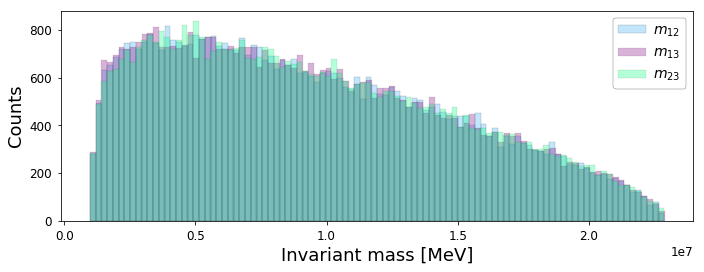

In [38]:
# plot the invariant mass for one of these combinations 
plt.figure(figsize = (10,4))
plt.hist(sim_data['H12_M'],bins=100,alpha = 0.5, label = '$m_{12}$', color = b);
plt.hist(sim_data['H13_M'],bins=100,alpha = 0.3, label = '$m_{13}$', color = p);
plt.hist(sim_data['H23_M'],bins=100,alpha = 0.3, label = '$m_{23}$', color = g);
plt.xlabel('Invariant mass [MeV]')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()
plt.savefig('../Plots/hist_diff_masses.png')


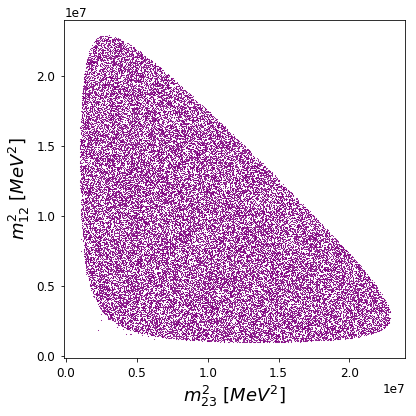

In [39]:
# make a Dalitz plot with labelled axes for the simulation data
plt.figure(figsize = (6,6))
plt.scatter(sim_data['H23_M'],sim_data['H12_M'], s=0.7, color = p)
plt.xlabel("$m^2_{23}$ [$MeV^2$]")
plt.ylabel("$m^2_{12}$ [$MeV^2$]")
plt.tight_layout()
plt.savefig("../Plots/dalits_fake_12_23.png")

### Hint

**Calculating the invariant mass** - Use the same technique as you did above for the B meson. But instead of using all three finalstate particles use only two.
**Plotting the Dalitz plot** - You can use the `scatter()` function from the `matplotlib` library or use the example given in the example analysis. Remember to use the square of each two-body mass.

## Adding Dalitz plot for real data
Now draw a Dalitz plot for the real data. Check that your two constructed resonances R<sup>0</sup><sub>2</sub> and R<sup>0</sup><sub>3</sub> have a neutral charge.

In [40]:
# calculate the invariant masses for each possible hadron pair combination in the real data
real_data['H12_M'] = invariant_mass_squared('H1', 'H2', real_data)
mask_12 = np.logical_and((real_data['H1_Charge'] + real_data['H2_Charge'] == 0), real_data['H12_M'])

real_data['H23_M'] = invariant_mass_squared('H2', 'H3', real_data)
mask_23 = np.logical_and((real_data['H2_Charge'] + real_data['H3_Charge'] == 0), real_data['H23_M'])

real_data['H13_M'] = invariant_mass_squared('H1', 'H3', real_data)
mask_13 = np.logical_and((real_data['H1_Charge'] + real_data['H3_Charge'] == 0), real_data['H13_M'])

print(mask_12.sum(),mask_23.sum(), mask_13.sum()) #they are ordered, fuck!


23659 0 23659


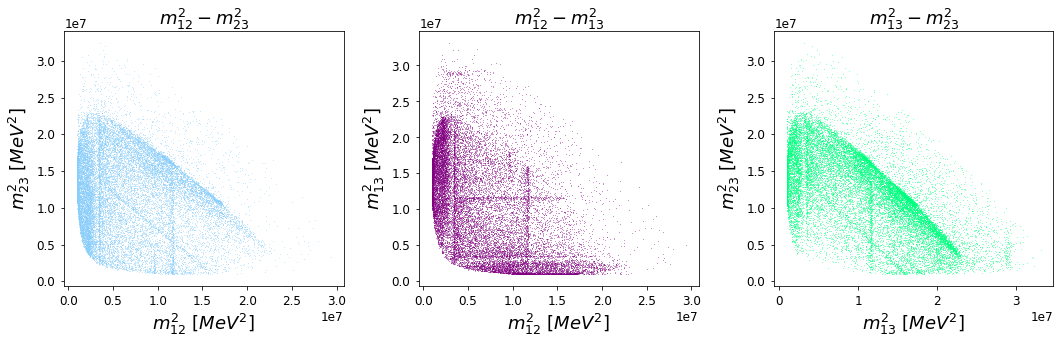

In [41]:
# make a Dalitz plot for the real data (with your preselection cuts applied)

fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].set_title("$m^2_{12} - m^2_{23}$")
axs[0].scatter(real_data['H12_M'],real_data['H23_M'], s=0.4, color = b, alpha = 0.6)
axs[0].set_xlabel("$m^2_{12}$ [$MeV^2$]")
axs[0].set_ylabel("$m^2_{23}$ [$MeV^2$]")

axs[1].set_title("$m^2_{12} - m^2_{13}$")
axs[1].scatter(real_data['H12_M'],real_data['H13_M'], s=0.4, color = p, alpha = 0.6)
axs[1].set_xlabel("$m^2_{12}$ [$MeV^2$]")
axs[1].set_ylabel("$m^2_{13}$ [$MeV^2$]")

axs[2].set_title("$m^2_{13} - m^2_{23}$")
axs[2].scatter(real_data['H13_M'],real_data['H23_M'], s=0.4, color = g, alpha = 0.6)
axs[2].set_xlabel("$m^2_{13}$ [$MeV^2$]")
axs[2].set_ylabel("$m^2_{23}$ [$MeV^2$]")

plt.tight_layout()
plt.savefig("../Plots/dalits_real_all.png")
# make a Dalitz plot with labelled axes for the simulation data

<div align="justify"> Label the axes of the Dalitz plot. Compare the Dalitz plot of the real data with the one for simulation. What are the most striking differences?
</div>

### Ordering the Dalitz variables
The visibility of the resonances in the Dalitz plot can be improved further. The resonances R<sup>0</sup><sub>1</sub> and R<sup>0</sup><sub>3</sub> are both composed of the same particle types, K<sup>+</sup>K<sup>-</sup>, and hence have the same distributions.
It is useful to impose an ordering which distinguishes the resonances to access more information. Therefore, we sort the two resonances in a combination of kaons with the respectively higher mass R<sup>0</sup><sub>High</sub> and one with the corresponding lower mass R<sup>0</sup><sub>Low</sub>. You can now use the mass of these ordered resonances as your Dalitz plot variables, thus effectively "folding" your Dalitz plot so that one axis always has a higher value than the other. The total energy range is now reduced, while still remaining with the same statistics. This leads to a higher event density and therefore much clearer structures in the Dalitz ../Plots.

In [42]:
# make a new Dalitz plot with a mass ordering of the axes
a = np.array([1,2,3,4])
b = np.array([3,1,2,5])

comb = np.array([a,b])
np.max(comb,axis = 0)

array([3, 2, 3, 5])

In [43]:
real_data['R_HIGH'] = np.max(np.array([real_data['H12_M'],real_data['H13_M']]),axis = 0)
real_data['R_LOW'] = np.min(np.array([real_data['H12_M'],real_data['H13_M']]),axis = 0)

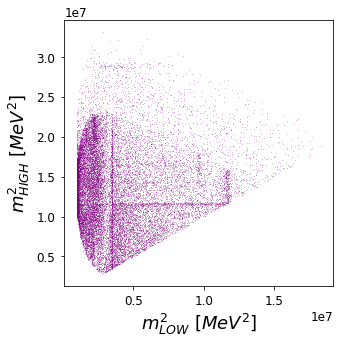

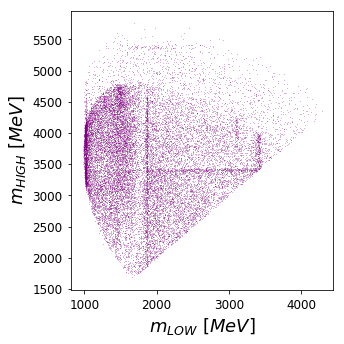

In [44]:
plt.figure(figsize = (5,5))
plt.scatter((real_data['R_LOW']),(real_data['R_HIGH']), s=0.1, color = p)
plt.xlabel("$m^2_{LOW}$ [$MeV^2$]")
plt.ylabel("$m^2_{HIGH}$ [$MeV^2$]")
plt.tight_layout()
plt.savefig("../Plots/dalits_real_low_high.png")


plt.figure(figsize = (5,5))
plt.scatter(np.sqrt(real_data['R_LOW']),np.sqrt(real_data['R_HIGH']), s=0.1, color = p)
plt.xlabel("$m_{LOW}$ [$MeV$]")
plt.ylabel("$m_{HIGH}$ [$MeV$]")
plt.tight_layout()
plt.savefig("../Plots/dalits_real_low_high_normal.png")


### Hint

**Sorting** - You can find the lower/higher mass by elementwise comparison of the determined masses R<sup>0</sup><sub>1</sub> and R<sup>0</sup><sub>3</sub>. The functions `numpy.min(a,b)` and `numpy.max(a,b)` from the `numpy` library can be helpful. Both functions perform an elementwise comparison between the arrays `a` and `b` and return one array filled by either the individual min/max element. 

### Binned Dalitz plot
In addition, the representation of the Dalitz ../Plots can be improved by using a binning scheme. Therefore, you can use the `hist2d()` function to create a 2D histogram.

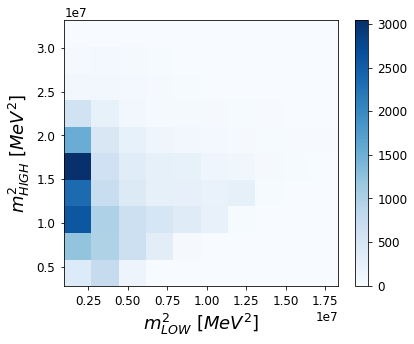

In [45]:
# plot a binned Dalitz Plot
# use colorbar() to make a legend for your plot at the side
plt.figure(figsize = (6,5))
plt.hist2d(real_data['R_LOW'],real_data['R_HIGH'], bins = 10)
plt.colorbar()
plt.xlabel("$m^2_{LOW}$ [$MeV^2$]")
plt.ylabel("$m^2_{HIGH}$ [$MeV^2$]")
plt.tight_layout()
plt.savefig("../Plots/dalits_real_low_high_bins.png")

## Two body resonances

You can now use your Dalitz plot to identify the intermediate resonances. These resonances create lines with higher event densities in the Dalitz ../Plots. You can use [PDG page](http://pdg.lbl.gov/2015/tables/contents_tables.html) to identify the observed resonances. The tables give the masses and widths of the particles and their decay modes. You are looking for mesons with the masses corresponding to where you see the bands and that decay into K<sup>+</sup>K<sup>-</sup>.

# Searching for local matter anti-matter differences
## Aims:
* Observe matter antimatter differences (CP violation) in regions of the Dalitz ../Plots of the B<sup>+</sup> and B<sup>-</sup> mesons
* Produce ../Plots to display the CP violation in certain regions

In a section above you searched for global CP violation. You probably did not find a result with very high significance. 

CP violation arises from interference between different decay chains with different intermediate resonances to a common final state. Therefore, the strength and the sign of the CP violation might vary in different kinematic regions. Hence, we can use the same equation that we already used for the global CP violation 

<latex>$$A = \frac{N^+ - N^-}{N^+ + N^-}$$</latex>

But we will use it in different kinematic regions independently.


## Removing charm resonances 

The analysis performed in this exercise is to study the CP violation in charmless $B$ meson decays to kaons. "Charmless" means that the decay does not proceed through a charm quark. However, the most frequent decay of the B mesons occur through the *b* quark decaying into a *c* quark. The majority of these events can be removed by rejecting the events that are proceeding through a D<sup>0</sup> meson (which contains the charm quark).

In the previous section you were most likely able to already identify a D<sup>0</sup> meson resonance in the Dalitz ../Plots. As a next step you should reject all events in this kinematic region to surpress the charm resonance contribution. You could add this step to your already existing preselection. By simply re-executing the previous analysis steps, you could observe the effects this change has on the Dalitz ../Plots.

In [46]:
cut_m_D0 = 1860
cut_p_D0 = 1880

cut_m_J = 3380
cut_p_J = 3420

# Corrected mask condition: select values between cut_m and cut_p

mask_low_1 = (np.sqrt(real_data['R_LOW']) < cut_m_D0) | (np.sqrt(real_data['R_LOW']) > cut_p_D0)
mask_high_1 = (np.sqrt(real_data['R_HIGH']) < cut_m_J) | (np.sqrt(real_data['R_HIGH']) > cut_p_J)

mask_high_2 = (np.sqrt(real_data['R_HIGH']) < cut_m_D0) | (np.sqrt(real_data['R_HIGH']) > cut_p_D0)
mask_low_2 = (np.sqrt(real_data['R_LOW']) < cut_m_J) | (np.sqrt(real_data['R_LOW']) > cut_p_J)

mask_high = np.logical_and(mask_high_1,mask_high_2)
mask_low = np.logical_and(mask_low_1,mask_low_2)

print(real_data['R_LOW'].shape)
'''
for k in real_data.keys():
    real_data[k] = real_data[k][mask].reset_index(drop=True)
'''
mask_join = np.logical_and(mask_low, mask_high)
real_data=real_data[mask_join]
#print(real_data['R_LOW'].shape)



(23659,)


(3100, 3600)

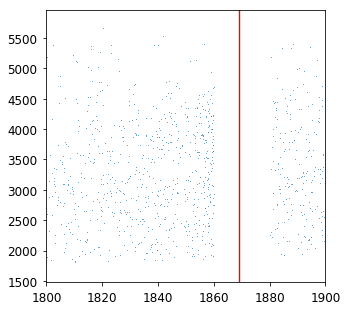

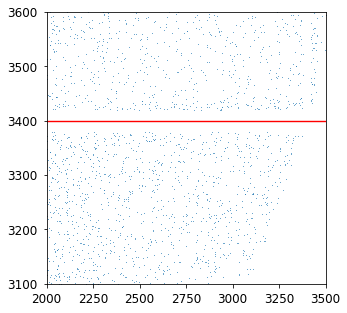

In [47]:
plt.figure(figsize = (5,5))
plt.scatter(np.sqrt(real_data['R_LOW']),np.sqrt(real_data['R_HIGH']), s=0.4)
plt.axvline(1869, color = 'red')
plt.xlim(1800,1900)

plt.figure(figsize = (5,5))
plt.scatter(np.sqrt(real_data['R_LOW']),np.sqrt(real_data['R_HIGH']), s=0.4)
plt.axhline(3400, color = 'red')
plt.xlim(2000,3500)
plt.ylim(3100,3600)

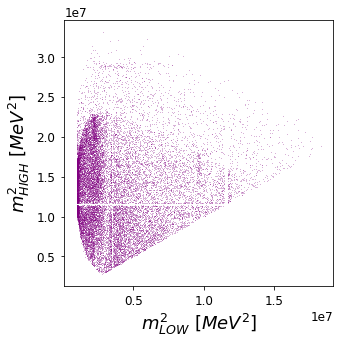

In [48]:
plt.figure(figsize = (5,5))
plt.scatter((real_data['R_LOW']),(real_data['R_HIGH']), s=0.1, color = p)
plt.xlabel("$m^2_{LOW}$ [$MeV^2$]")
plt.ylabel("$m^2_{HIGH}$ [$MeV^2$]")
plt.tight_layout()
plt.savefig("../Plots/dalits_real_low_no_resonance.png")

## Comparing Dalitz ../Plots

Make separate Dalitz ../Plots for the B<sup>+</sup> and the B<sup>-</sup> decays. Local CP violation will show up as asymmetry between both ../Plots.

In order that the statistical error on the asymmetry in each bin is not overly large, the bins need to contain a reasonable number of entries. Therefore, a coarser binning is needed compared to the Dalitz ../Plots that you used to search for the resonances. A suitable initial bin width should be in the order of a few $\text{GeV}^2/\text{c}^4$.

In [49]:
mask_b_plus = real_data['B_CH'] == 1
mask_b_minus = real_data['B_CH'] == -1

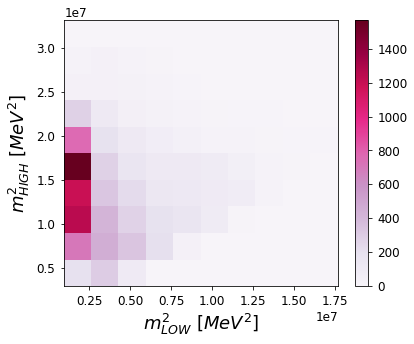

In [50]:
# make a Dalitz plot for the B+ events
plt.figure(figsize = (6,5))
hist_plus = plt.hist2d(real_data['R_LOW'][mask_b_plus],real_data['R_HIGH'][mask_b_plus], bins=10, cmap = 'PuRd')
plt.colorbar()
plt.xlabel("$m^2_{LOW}$ [$MeV^2$]")
plt.ylabel("$m^2_{HIGH}$ [$MeV^2$]")
plt.tight_layout()
plt.savefig("../Plots/dalits_mask_b_plus.png")

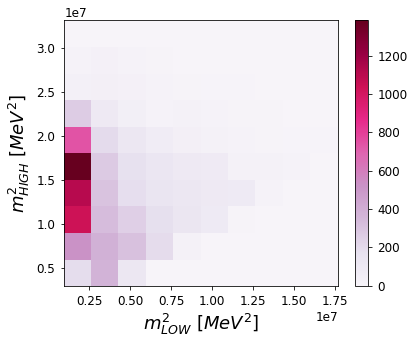

In [51]:
x_bins = hist_plus[1]
y_bins = hist_plus[2]

plt.figure(figsize = (6,5))

hist_minus = plt.hist2d(real_data['R_LOW'][mask_b_minus],real_data['R_HIGH'][mask_b_minus], bins=[x_bins, y_bins], cmap='PuRd')
plt.colorbar()
plt.xlabel("$m^2_{LOW}$ [$MeV^2$]")
plt.ylabel("$m^2_{HIGH}$ [$MeV^2$]")
plt.tight_layout()
plt.savefig("../Plots/dalits_mask_b_minus.png")

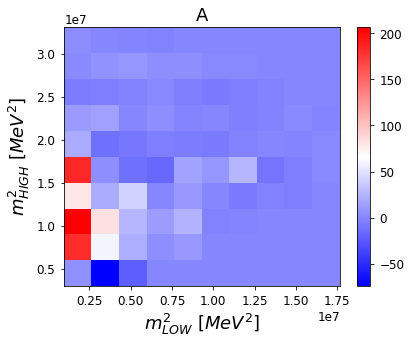

In [52]:
# Make a plot showing the asymmetry between these two Daltz ../Plots
# i.e. calculate the asymmetry between each bin of the B+ and B- Dalitz ../Plots and show the result in another 2D plot
plt.figure(figsize=(6, 5))
plt.pcolormesh(hist_plus[1],hist_plus[2], (hist_plus[0].T - hist_minus[0].T) , cmap='bwr')
plt.colorbar()
plt.title('A')
plt.xlabel("$m^2_{LOW}$ [$MeV^2$]")
plt.ylabel("$m^2_{HIGH}$ [$MeV^2$]")
plt.tight_layout()
plt.savefig("../Plots/dalits_A.png")

Observing a large asymmetry in some regions of the plot does not necessarily mean you have observed CP violation. If there are only very few events in that region of the plot the uncertainty on that large asymmetry may be large, too. Hence, the value may still be compatible with zero.

You can calculate the statistical uncertainty on the asymmetry, for each bin of the plot, using the same formulas as you used in the global asymmetry section. You can then make a plot showing the uncertainty on the asymmetry.

By dividing the plot showing the asymmetry by the plot showing the statistical uncertainty you can then obtain the significance of the asymmetry in each bin. Plotting the significance provides a way to select regions with CP violation. 

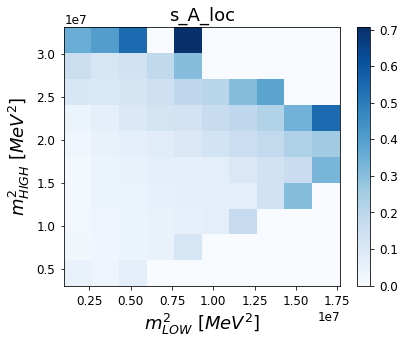

In [53]:
# Make a plot showing the uncertainty on the asymmetry 
#Asig = abs(A / Aerr)
A_loc = (hist_plus[0].T - hist_minus[0].T) / (hist_plus[0].T + hist_minus[0].T)
s_A_loc = np.sqrt((1-A_loc**2) / (hist_plus[0].T + hist_minus[0].T))


s_A_loc[np.isnan(s_A_loc)] = 0

plt.figure(figsize=(6, 5))
plt.pcolormesh(hist_plus[1],hist_plus[2],s_A_loc)
plt.colorbar()
plt.title('s_A_loc')
plt.xlabel("$m^2_{LOW}$ [$MeV^2$]")
plt.ylabel("$m^2_{HIGH}$ [$MeV^2$]")
plt.tight_layout()
plt.savefig("../Plots/dalits_sigma_A.png")

In [54]:
sign = A/s_A_loc 
sign[np.isinf(sign)] = 0
sign.max()

1.9597941605054068

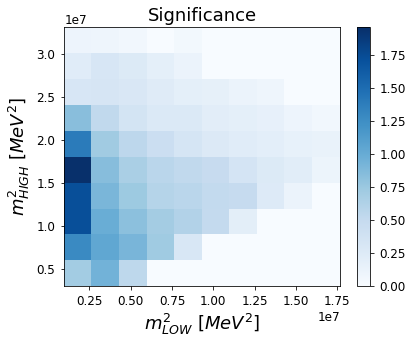

In [55]:
plt.figure(figsize=(6, 5))
plt.pcolormesh(hist_plus[1],hist_plus[2],sign)
plt.colorbar()
plt.title('Significance')
plt.xlabel("$m^2_{LOW}$ [$MeV^2$]")
plt.ylabel("$m^2_{HIGH}$ [$MeV^2$]")
plt.tight_layout()
plt.savefig("../Plots/dalits_significance.png")

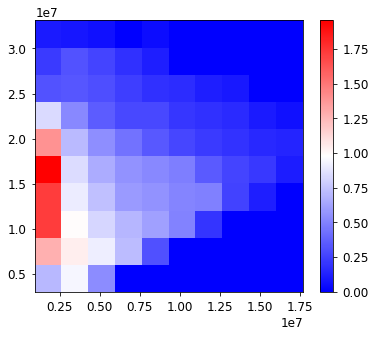

In [56]:
# Make a plot showing the statistical significance of the asymmetry
plt.figure(figsize=(6, 5))
plt.pcolormesh(hist_plus[1],hist_plus[2],sign, cmap='bwr')


x0 = [0.1e7, 0.7e7]
y0 = [0.6e7, 2.5e7]
m0= (y0[1]-y0[0])/(x0[1]-x0[0])
q0=y0[0]-m0*x0[0]

x1 = [1.25e7, 0.7e7]
y1 = [0.5e7, 2.5e7]
m1= (y1[1]-y1[0])/(x1[1]-x1[0])
q1=y1[0]-m1*x1[0]

#print(y0[0], m0, q0, m1, q1)

#plt.plot(x0, y0, color='red')
#plt.plot(x1, y1, color='red')
plt.colorbar()

In [57]:
print(hist_plus[1][1],hist_plus[2][1],hist_plus[2][6])

2647671.78277421 6027566.645994091 21107053.523687743


In [58]:
def getSignificance(data):
    N_P = np.sum(data['B_CH'] + 1)/2
    N_M = -np.sum(data['B_CH'] - 1)/2

    A = (N_P - N_M) /(N_P + N_M)
    sig = np.sqrt((1-A**2)/(N_P + N_M))
    s=A/sig

    return A, sig, s

## Observing CP violation
The previous investigations of the asymmetry and its significance should also now make it possible to select a region in the Dalitz plot that shows signs of significant CP violation of a certain size. This can be identified by a collection of contiguous bins with significant positive (or negative) asymmetry. It may help to vary the binning to select the optimal region.

You can now select the corresponding kinematic region in your data. Then, using a simple 1D histogram, plot the invariant mass distributions for the B<sup>+</sup> and B<sup>-</sup> events,
just as you did it for the global asymmetry. However, this time the events are exclusively in the kinematic region of interest. Now repeat the procedure to determine the CP violation for the selected data, count the respective event rate, calculate the asymmetry, its statistical uncertainty and the resulting significance of the measured CP violation.

In [59]:
'''
x_max = 1.2e7
y_max = 1e7

# # Define the masks for selecting data within the region
mask_y = (real_data['R_HIGH'] < y_max)
mask_x = (real_data['R_LOW'] < x_max)

# # Adjust the mask_y to correctly use the slopes and intercepts
mask_y_plane = (real_data['R_HIGH'] < m0 * real_data['R_LOW'] + q0)  & (real_data['R_HIGH'] < m1 * real_data['R_LOW'] + q1)

# # Combine the masks
mask_join = np.logical_and(mask_x, mask_y)
mask_join = np.logical_and(mask_join, mask_y_plane)

'''
x_max = hist_plus[1][1]


y_min = hist_plus[2][1]
y_max = hist_plus[2][6]
# Define the masks for selecting data within the region
mask_y = (real_data['R_HIGH'] > y_min) & (real_data['R_HIGH'] < y_max)
mask_x = (real_data['R_LOW'] < x_max)

# Combine the masks
mask_join = np.logical_and(mask_x, mask_y)


In [60]:
selected_data = real_data[mask_join]

In [61]:
local_cp=getSignificance(selected_data)
print("A local = {}".format(local_cp[0]))
print("sigma local = {}".format(local_cp[1]))
print("Significance local = {}".format(local_cp[2]))

global_cp=getSignificance(real_data)
print("A global = {}".format(global_cp[0]))
print("sigma global = {}".format(global_cp[1]))
print("Significance global = {}".format(global_cp[2]))

A local = 0.06475099504902436
sigma local = 0.009832137900754968
Significance local = 6.585647567458589
A global = 0.03966710389434167
sigma global = 0.006720065473679441
Significance global = 5.902785329950472


In [62]:
selected_data.describe()

,B_FlightDistance,B_VertexChi2,H1_PX,H1_PY,H1_PZ,H1_ProbK,H1_ProbPi,H1_Charge,H1_IPChi2,H1_isMuon,H2_PX,H2_PY,H2_PZ,H2_ProbK,H2_ProbPi,H2_Charge,H2_IPChi2,H2_isMuon,H3_PX,H3_PY,H3_PZ,H3_ProbK,H3_ProbPi,H3_Charge,H3_IPChi2,H3_isMuon,H1_P,H1_E,H2_P,H2_E,H3_P,H3_E,B_E,B_PX,B_PY,B_PZ,B_P,B_M,B_CH,H12_M,H23_M,H13_M,R_HIGH,R_LOW
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.0,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.0,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.0,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,1.030100e+04,1.030100e+04,1.030100e+04,1.030100e+04,1.030100e+04
mean,12.629247,4.117774,45.600734,8.901816,30890.697902,0.822104,0.099432,-0.064751,1338.136465,0.0,20.296811,-2.548410,24920.772388,0.801309,0.085480,0.064751,2366.848735,0.0,9.006444,26.157944,41772.736311,0.845923,0.131578,0.064751,2353.872655,0.0,31026.809543,31032.452561,25013.261910,25020.256077,42013.013058,42016.976837,98069.685475,74.903989,32.511350,97584.206600,97904.363113,5300.595701,0.064751,5.389980e+06,1.333009e+07,1.013696e+07,1.391164e+07,1.615306e+06
std,11.050852,2.986410,2180.403742,1977.125766,18502.241099,0.139916,0.083399,0.997950,3035.827403,0.0,1485.311455,1390.499980,15480.909082,0.140753,0.072369,0.997950,8897.067075,0.0,3273.225871,2892.752183,22708.246017,0.137295,0.107288,0.997950,4828.108722,0.0,18508.640133,18505.763013,15465.438287,15462.003276,22685.094303,22683.124466,37052.137565,5809.858799,5112.834035,37145.997591,37109.760457,171.966620,0.997950,5.645647e+06,4.086734e+06,6.861925e+06,3.788382e+06,5.179838e+05
min,3.000714,0.003034,-11608.221573,-10057.630068,3489.988724,0.500452,0.011461,-1.000000,1.007659,0.0,-6543.971233,-7357.803269,3725.372796,0.500343,0.011130,-1.000000,1.001098,0.0,-13600.838068,-10098.361985,5252.710154,0.500306,0.011349,-1.000000,1.008668,0.0,3516.470000,3550.954554,3775.360000,3807.500507,5484.090000,5506.265532,27184.663523,-24911.714163,-22670.277882,26487.444756,26669.555261,5050.025002,-1.000000,9.750925e+05,3.317105e+06,9.758606e+05,6.028382e+06,9.750925e+05
25%,6.038322,1.702337,-1266.691853,-1183.605585,16964.303681,0.705809,0.045425,-1.000000,132.492891,0.0,-985.652207,-968.217138,13245.562377,0.684616,0.042164,-1.000000,201.997879,0.0,-2331.869370,-2012.808682,24048.543636,0.756424,0.058820,-1.000000,331.883838,0.0,17076.600000,17083.734502,13360.850000,13369.967453,24297.400000,24302.414772,70064.878546,-3753.432313,-3245.616900,69531.019110,69866.835080,5263.744065,-1.000000,1.279170e+06,1.054297e+07,2.024677e+06,1.076223e+07,1.073480e+06
50%,9.452528,3.392899,32.093653,77.103361,26409.394439,0.885138,0.074552,-1.000000,419.490950,0.0,20.876606,-36.199486,20909.830301,0.820796,0.061684,1.000000,664.180226,0.0,-108.190895,150.792269,36846.034521,0.921318,0.098950,1.000000,856.753934,0.0,26568.110000,26572.696249,20991.260000,20997.064399,37146.550000,37149.830335,92642.921401,123.105475,96.562282,92167.423386,92492.182377,5282.709764,1.000000,2.104156e+06,1.294457e+07,1.130263e+07,1.431211e+07,1.529645e+06
75%,15.620114,5.997612,1373.320980,1237.637510,40724.639094,0.939403,0.119102,1.000000,1251.114925,0.0,1000.328509,979.594815,32630.859471,0.929034,0.102260,1.000000,2014.142171,0.0,2397.121205,2046.741608,55701.799747,0.949768,0.150600,1.000000,2330.387329,0.0,40927.950000,40930.927282,32755.270000,32758.990060,55906.600000,55908.779637,119726.148343,3838.354562,3365.957817,119417.894541,119616.889380,5299.182299,1.000000,9.973439e+06,1.651775e+07,1.623704e+07,1.677354e+07,2.077687e+06
max,364.418913,11.989183,12490.398522,9671.774651,144018.373870,0.981385,0.486998,1.000000,64200.427302,0.0,6838.872768,5525.251226,112497.192511,0.980252,0.487310,1.000000,668183.869158,0.0,12595

Text(0.5, 1.0, 'B Minus')

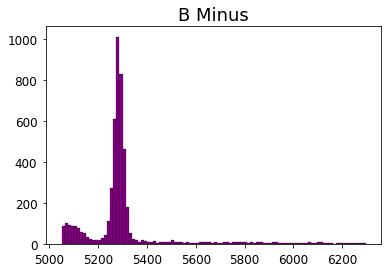

In [63]:
# Make a plot showing the invariant mass of the B+ meson particles
# using events from a region of the Dalitz plot showing sizeable CP asymmetries
plt.hist(selected_data['B_M'][selected_data['B_CH']<0], bins = 100, color = 'purple');
plt.title('B Minus')

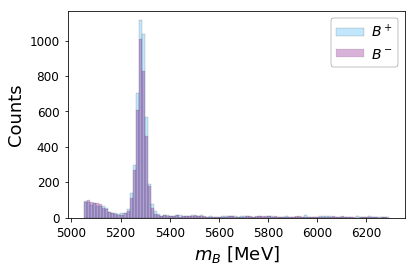

In [64]:
# Make a plot showing the invariant mass of the B- meson particles using events from the same region
plt.hist(selected_data['B_M'][selected_data['B_CH']>0], bins = 100, color = 'lightskyblue', label = '$B^+$', alpha = 0.5);
plt.hist(selected_data['B_M'][selected_data['B_CH']<0], bins = 100, color = p, label = '$B^-$', alpha = 0.3);
plt.legend()
plt.xlabel('$m_B$ [MeV]')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('../Plots/final_masses.png')

CP asymmetry

**Congratulations!** You should now have succesfully observed significant evidence for CP Violation. Your Dalitz ../Plots should show, that the decay widths of particles and anti-particles differ in different kinematic regions. You may wish to comapre your results with those published by the LHCb collaboration in this [Paper](http://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-027.html).

# Further analyses

The dataset used in your analysis contains an inclusive set of charged B meson decays into three charged tracks recorded at the LHCb experiment. Hence, this dataset has been used for further publicated measurements (you can fin some [here](http://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-027.html) and [here](http://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-051.html)).

There are further possibilities to extend this analysis. The following two possibilities will be allobrated in more details:
<ul>
<li>Additional elements that you could add to your analysis of B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup> </li>
<li>Similar analyses on this dataset</li>
</ul>

## Adding extra sophistication

### Systematic Uncertainties
In this analysis you considered the statistical uncertainty on the result. This occurs as a result of having only a limited number of events. In addition there are [systematic uncertainties](https://en.wikipedia.org/wiki/Observational_error#Systematic_versus_random_error), these arise from biases in your measurement. Here we discuss three possible sources of those for this analysis.
<ul>
<li> Production asymmetry. The LHC is a proton-proton collider and hence the initial state of the collision is not matter antimatter symmetric. Consequently B<sup>+</sup> and B<sup>-</sup> mesons may not be produced at exactly the same rates. This small production asymmetry it is estimated to be approximately 1%. It can also be measured from the data, as discussed in the LHCb paper.</li>
<li> Detection asymmetry. The LHCb detector could be more efficient for detecting either the B<sup>+</sup> or the B<sup>-</sup> final states. This is because the positive and negative kaons will be bent by the magnet indifferent directions in the detector. If the efficiency of the detector is higher in one region than in another this will lead to higher efficiencies for K<sup>+</sup> or K<sup>-</sup> and hence for B<sup>+</sup> or B<sup>-</sup>. For this reason the magnetic field of the LHCb detector is regularly reversed. You used data in this analysis in which the magnetic field was both up and down and hence the effect will (partially) cancel. By comparing results for the two magnet polarities separately you can check the size of this effect. When loading the data above both polarities were combined, you can instead load them independently to measure the difference between the two datasets.</li>
<li> Analysis technique. The analysis technique you have used may bias the result. A major simplification we made in the analysis above was to neglect 'background' events. We imposed a selection to select a sample of predominantly signal events but have not accounted for the effect of the residual background events.</li>
</ul>

### Using mass sidebands

One source of 'background' events arises from random combinations of tracks in events that happen to fake the 'signal' characteristics. These events will not peak in the mass distribution at the mass of the B meson but will have a rather smoothly varying distribution. Looking at the number and distribution of events away from the mass peak can allow you to estimate the number of background events under the mass peak.

### Fitting distributions

The next level of sophistication in the analysis requires fitting the distributions of events that are observed in the B mass distribution in order to estimate the yield of signal events and background events. You can see how this is done in the LHCb paper on the analysis. Fitting can be performed using for example the [CERN root framework](https://root.cern.ch/), the [zfit](https://zfit.readthedocs.io/en/latest/) or the [iminuit](https://iminuit.readthedocs.io/en/stable/about.html) libaries.

## Further analyses

The LHCb papers using the data set, that you are using, analysed four decay channels of the charged B mesons. You can perform any of these analyses.
<ul>
<li>B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup> (and anti-particle equivalent). This is the analysis you have performed here. It has the lowest background of the four channels and hence the approximation we made of neglecting the background events will give the least bias to this channel.</li>
<li>B<sup>+</sup> → &pi;<sup>+</sup>&pi;<sup>+</sup>&pi;<sup>−</sup> (and anti-particle equivalent). In this analysis the final state is three charged pions. The level of background events compared to the signal is significantly higher as pions are the most commonly produced particle at the LHC. Hence, a method of estimating the background level should be added to complete this analysis.</li>
<li>B<sup>+</sup> → K<sup>+</sup>&pi;<sup>+</sup>&pi;<sup>−</sup> (and anti-particle equivalent). In this analysis the final state is a mixture of one kaon and two pions. This means that the analysis needs to determine in each event which track is the best candidate kaon and apply selection cuts appropriately to select the events.</li>
<li>B<sup>+</sup> → &pi;<sup>+</sup>K<sup>+</sup>K<sup>−</sup> (and anti-particle equivalent). This channel has a higher level of background compared to the signal.</li>
</ul>